Model Performance:
RMSE: 537.89 seconds
R^2 Score: 0.83

Model Coefficients:
                      Coefficient
Distance (Raw)          -0.234452
Elevation Gain (Raw)     6.845745
Pace_sec_per_km          0.808523


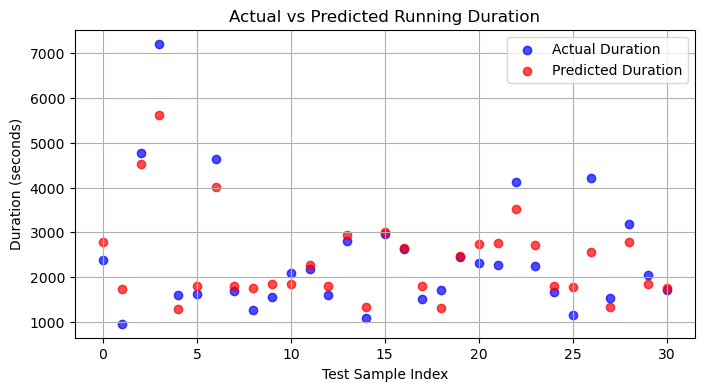

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Helper functions to convert time strings to seconds
def duration_to_seconds(t):
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        h, m, s = parts
        return int(h)*3600 + int(m)*60 + int(s)
    elif len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

def pace_to_seconds(pace_str):
    if pd.isna(pace_str):
        return None
    parts = pace_str.split(':')
    if len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

# Load dataset
df = pd.read_csv('activities_cleaned.csv')

# Convert Duration and Pace to seconds
df['Duration_sec'] = df['Duration (h:m:s)'].apply(duration_to_seconds)
df['Pace_sec_per_km'] = df['Average Moving Speed'].apply(pace_to_seconds)

# Select features and target, dropping rows with missing values
features = ['Distance (Raw)', 'Elevation Gain (Raw)', 'Pace_sec_per_km']
df_model = df.dropna(subset=features + ['Duration_sec'])

X = df_model[features]
y = df_model['Duration_sec']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"RMSE: {rmse:.2f} seconds")
print(f"R^2 Score: {r2:.2f}")

# Model coefficients
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)

# Create a DataFrame with actual and predicted durations for plotting
plot_df = results.reset_index(drop=True)
plt.figure(figsize=(8,4))
# Scatter plot: Actual vs Predicted
plt.scatter(plot_df.index, plot_df['Actual Duration (sec)'], color='blue', label='Actual Duration', alpha=0.7)
plt.scatter(plot_df.index, plot_df['Predicted Duration (sec)'], color='red', label='Predicted Duration', alpha=0.7)
plt.xlabel('Test Sample Index')
plt.ylabel('Duration (seconds)')
plt.title('Actual vs Predicted Running Duration')
plt.legend()
plt.grid(True)
plt.show()

Model Evaluation Summary:
Linear Regression: RMSE = 537.89 seconds, R² = 0.83
Ridge Regression: RMSE = 537.89 seconds, R² = 0.83
Random Forest: RMSE = 320.06 seconds, R² = 0.94
Gradient Boosting: RMSE = 277.70 seconds, R² = 0.96


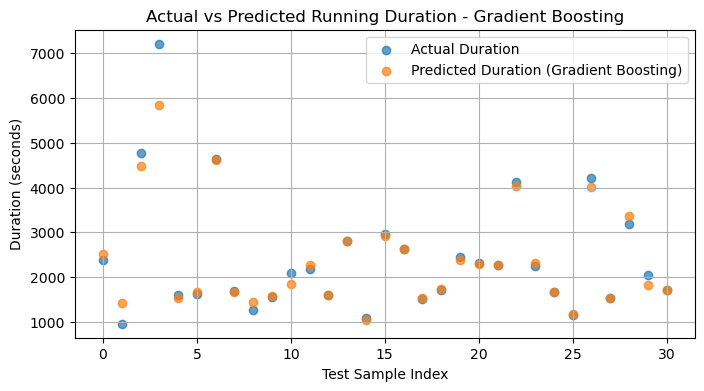

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Helper functions to convert time strings to seconds
def duration_to_seconds(t):
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        h, m, s = parts
        return int(h)*3600 + int(m)*60 + int(s)
    elif len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

def pace_to_seconds(pace_str):
    if pd.isna(pace_str):
        return None
    parts = pace_str.split(':')
    if len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

# Load dataset
df = pd.read_csv('activities_cleaned.csv')

# Convert Duration and Pace to seconds
df['Duration_sec'] = df['Duration (h:m:s)'].apply(duration_to_seconds)
df['Pace_sec_per_km'] = df['Average Moving Speed'].apply(pace_to_seconds)

# Select features and target, drop missing values
features = ['Distance (Raw)', 'Elevation Gain (Raw)', 'Pace_sec_per_km']
df_model = df.dropna(subset=features + ['Duration_sec'])

X = df_model[features]
y = df_model['Duration_sec']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'model': model, 'RMSE': rmse, 'R2': r2, 'y_pred': y_pred}

# Print evaluation summary
print("Model Evaluation Summary:")
for name, res in results.items():
    print(f"{name}: RMSE = {res['RMSE']:.2f} seconds, R² = {res['R2']:.2f}")

# Plot Actual vs Predicted for best model (lowest RMSE)
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_preds = results[best_model_name]['y_pred']

plt.figure(figsize=(8,4))
plt.scatter(range(len(y_test)), y_test, label='Actual Duration', alpha=0.7)
plt.scatter(range(len(y_test)), best_preds, label=f'Predicted Duration ({best_model_name})', alpha=0.7)
plt.xlabel('Test Sample Index')
plt.ylabel('Duration (seconds)')
plt.title(f'Actual vs Predicted Running Duration - {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()


Model Evaluation Summary:
Linear Regression: RMSE = 537.89 seconds, R² = 0.83
Ridge Regression: RMSE = 537.89 seconds, R² = 0.83
Random Forest: RMSE = 313.79 seconds, R² = 0.94
Gradient Boosting: RMSE = 274.62 seconds, R² = 0.96
Stacking Ensemble: RMSE = 268.05 seconds, R² = 0.96


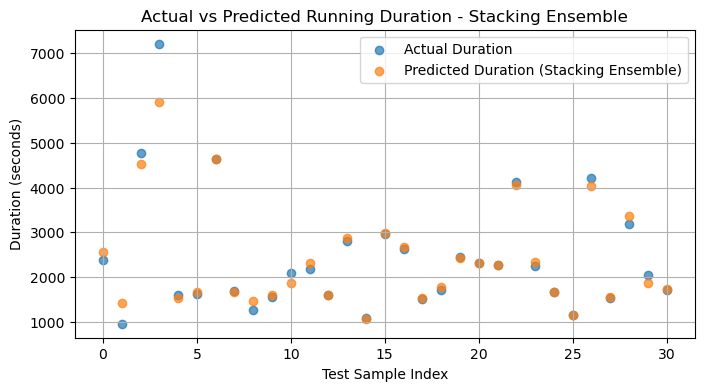

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Helper functions
def duration_to_seconds(t):
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        h, m, s = parts
        return int(h)*3600 + int(m)*60 + int(s)
    elif len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

def pace_to_seconds(pace_str):
    if pd.isna(pace_str):
        return None
    parts = pace_str.split(':')
    if len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

# Load dataset
df = pd.read_csv('activities_cleaned.csv')

# Convert Duration and Pace to seconds
df['Duration_sec'] = df['Duration (h:m:s)'].apply(duration_to_seconds)
df['Pace_sec_per_km'] = df['Average Moving Speed'].apply(pace_to_seconds)

# Select features and target, drop missing values
features = ['Distance (Raw)', 'Elevation Gain (Raw)', 'Pace_sec_per_km']
df_model = df.dropna(subset=features + ['Duration_sec'])

X = df_model[features]
y = df_model['Duration_sec']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Base Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Tune Random Forest
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Tune Gradient Boosting
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

# Stacking Ensemble
base_learners = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('rf', best_rf),
    ('gb', best_gb),
    ('svr', SVR(kernel='rbf', C=10, gamma=0.1))
]

stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=LinearRegression()
)

# Train and Evaluate Models
results = {}

# Evaluate tuned individual models
for name, model in models.items():
    if name == 'Random Forest':
        model = best_rf
    elif name == 'Gradient Boosting':
        model = best_gb
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'model': model, 'RMSE': rmse, 'R2': r2, 'y_pred': y_pred}

# Evaluate stacking ensemble
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)
results['Stacking Ensemble'] = {'model': stacking_model, 'RMSE': rmse_stack, 'R2': r2_stack, 'y_pred': y_pred_stack}

# Print Evaluation Summary
print("Model Evaluation Summary:")
for name, res in results.items():
    print(f"{name}: RMSE = {res['RMSE']:.2f} seconds, R² = {res['R2']:.2f}")

# Plot Actual vs Predicted for Best Model
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_preds = results[best_model_name]['y_pred']

plt.figure(figsize=(8,4))
plt.scatter(range(len(y_test)), y_test, label='Actual Duration', alpha=0.7)
plt.scatter(range(len(y_test)), best_preds, label=f'Predicted Duration ({best_model_name})', alpha=0.7)
plt.xlabel('Test Sample Index')
plt.ylabel('Duration (seconds)')
plt.title(f'Actual vs Predicted Running Duration - {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()


Stacking Ensemble with Boosting Models: RMSE = 266.90, R² = 0.96
5-Fold CV RMSE: 118646.54


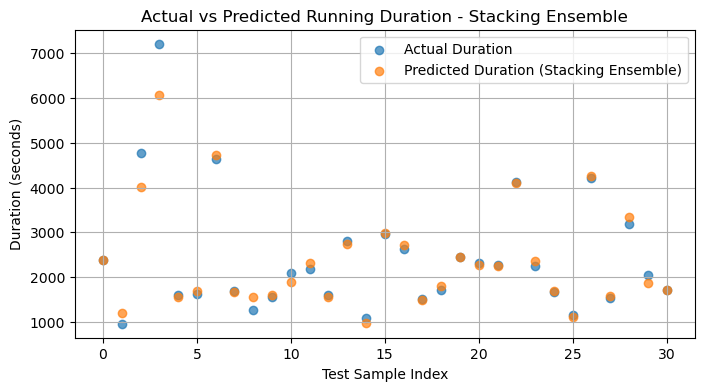

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Helper functions
def duration_to_seconds(t):
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        h, m, s = parts
        return int(h)*3600 + int(m)*60 + int(s)
    elif len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

def pace_to_seconds(pace_str):
    if pd.isna(pace_str):
        return None
    parts = pace_str.split(':')
    if len(parts) == 2:
        m, s = parts
        return int(m)*60 + int(s)
    else:
        return None

# Load dataset
df = pd.read_csv('activities_cleaned.csv')

# Convert Duration and Pace to seconds
df['Duration_sec'] = df['Duration (h:m:s)'].apply(duration_to_seconds)
df['Pace_sec_per_km'] = df['Average Moving Speed'].apply(pace_to_seconds)

# Select features and target
features = ['Distance (Raw)', 'Elevation Gain (Raw)', 'Pace_sec_per_km']
df_model = df.dropna(subset=features + ['Duration_sec'])
X = df_model[features]
y = df_model['Duration_sec']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

xgb_model = XGBRegressor(random_state=42, verbosity=0, tree_method='hist', n_jobs=-1)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_


cat_model = CatBoostRegressor(verbose=0, random_state=42, task_type='CPU')
param_grid_cat = {
    'iterations': [200, 300],
    'depth': [3, 5],
    'learning_rate': [0.1]
}
grid_cat = GridSearchCV(cat_model, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cat.fit(X_train, y_train)
best_cat = grid_cat.best_estimator_


# Define base learners
base_learners = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('rf', best_rf),
    ('gbr', best_gb),
    ('xgb', best_xgb),
    ('cat', best_cat)
]

stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=LinearRegression(),
    cv=5
)

# Train Stacking Ensemble
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

# Evaluate on test set
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)
print(f"Stacking Ensemble with Boosting Models: RMSE = {rmse_stack:.2f}, R² = {r2_stack:.2f}")

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = -cross_val_score(stacking_model, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_mean = np.sqrt(cv_rmse.mean())
print(f"5-Fold CV RMSE: {cv_rmse_mean:.2f}")


# Plot Actual vs Predicted
plt.figure(figsize=(8,4))
plt.scatter(range(len(y_test)), y_test, label='Actual Duration', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_stack, label='Predicted Duration (Stacking Ensemble)', alpha=0.7)
plt.xlabel('Test Sample Index')
plt.ylabel('Duration (seconds)')
plt.title('Actual vs Predicted Running Duration - Stacking Ensemble')
plt.legend()
plt.grid(True)
plt.show()